In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Parameters
lr = 0.0001
epochs = 20

In [3]:
# Generate Input Data

n = 400
mA = [1, 0]
mB = [-1, 0.5]

sigmaA = 0.5
sigmaB = 0.5

classA = np.ones((4, n))

classA[0, :] = np.random.rand(1, n) * sigmaA + mA[0]

classA[1, :] = np.random.rand(1, n) * sigmaA + mA[1]

classB = np.zeros((4, n))

classB[0, :] = np.random.rand(1, n) * sigmaB + mB[0]

classB[1, :] = np.random.rand(1, n) * sigmaB + mB[1]


In [4]:
# Add bias
ones_vector = np.ones(n)

classA[2] = ones_vector
classB[2] = ones_vector


In [5]:
# Create shuffled dataset
X = np.concatenate((classA.T, classB.T))
X = X.T
np.random.shuffle(X.T)
X_train = X[:, :n]
X_test = X[:, n:]

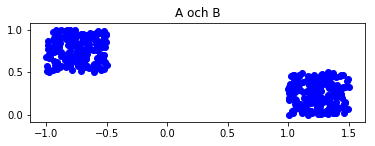

In [6]:
# Plot dataset
fig = plt.figure()
ax = fig.add_subplot(211)
ax.scatter(X_train[0, :], X_train[1,:], c = ["blue"], marker = "o")
ax.set(title='A och B')
plt.show()

In [25]:
# Weights: random with 0 mean. 
def init_W():
    #np.random.seed(42)
    w = []
    for i in range(3):
        w.append(np.random.normal(0.5,0.01))
    return w

In [8]:
r = np.random.normal()
r

-0.27830063711063197

In [9]:
def accuracy(W, x, t):
    predictions = []
    correct = 0
    
    for i in range(len(t)):
        pred = np.dot(W, x[:,i])
        if pred > 0.5:
            predictions.append(1.0)
        else:
            predictions.append(0.0)

    for i in range(len(predictions)):
        if predictions[i]==t[i]:
            correct+=1
    return correct/len(t)

In [10]:
def linear_eq(k, x, x0):
    return k*x+x0[1]

def plot_decision_boundary(w):
    # Find linear function
    w1, w2, b = w[0], w[1], w[2]
    x0 = (0, -b / w2)
    y0 = (-b / w1, 0)    
    k = -(b / w2) / (b / w1)
    x = np.linspace(-2, 2, 100)
    fx = linear_eq(k, x, x0)
    
    # Plot points and decision boundary
    #fig = plt.figure()
    #ax = plt.axes()
    #ax.set_ylim([-1,2])
    #ax.scatter(X[0][:200], X[1][:200], c = ["blue"], marker = "o")
    plt.plot(x, fx)
    
    plt.show()
    plt.pause(0.0001)

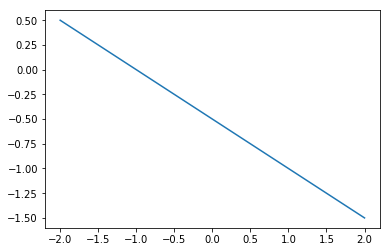

In [11]:
plot_decision_boundary([1, 2, 1])

W init: [0.49614917719583684, 0.4932307799969404, 0.5061167628884087]
W: [0.52629215 0.36821498 0.31507096]


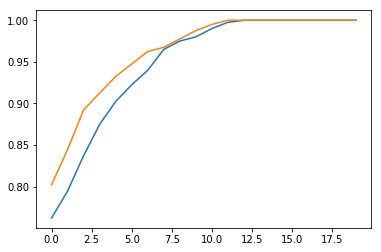

In [35]:
# Delta rule
W = init_W()
print('W init:', W)
targets = X_train[3,:]
input_points = X_train[:3,:]

train_accs = []
test_accs = []

for e in range(epochs):
    epsilon = 0
    deltaW = 0

    for i in range(len(targets)):
        Wx = np.dot(W, input_points[:,i])
        epsilon = Wx - targets[i]

        # Compute Delta
        deltaW += -lr*np.dot(epsilon, np.transpose(input_points[:,i]))
    
    # Update W
    W += deltaW
    
    # Calculate accuracy for train and test
    train_accuracy = accuracy(W, X_train[:3,:], X_train[3,:])
    test_accuracy = accuracy(W, X_test[:3,:], X_test[3,:])
    
    train_accs.append(train_accuracy)
    test_accs.append(test_accuracy)
print('W:', W)    
plt.plot(train_accs)
plt.plot(test_accs)
plt.show()

In [38]:
a = accuracy(W, X_train[:3,:], X_train[3,:])
a

1.0

In [14]:
test_accs[epochs-1]

1.0